In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_spark=pd.read_csv("F:\\Sparkling (1).csv")

In [3]:
df_rose=pd.read_csv("F:\\Rose (1).csv")

In [4]:
df_spark

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471
...,...,...
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688


In [5]:
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [6]:
df_spark.isna().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [7]:
df_spark['YearMonth'] = pd.to_datetime(df_spark['YearMonth'])

In [8]:
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Sparkling  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [9]:
df_spark.set_index('YearMonth',inplace=True)

In [10]:
df_spark

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


<AxesSubplot:xlabel='YearMonth'>

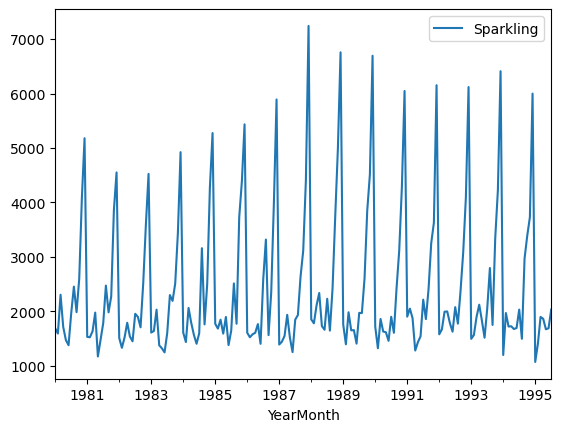

In [11]:
df_spark.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def test_adfuller(sales):
    result  = adfuller(sales)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1]<=0.05:
        print('data is stationary')
    else:
        print('data is not stationary')

In [14]:
test_adfuller(df_spark)

ADF statistics: -1.3604974548123325
p-value: 0.6010608871634875
data is not stationary


In [15]:
df_spark

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


In [16]:
df_spark['spark first difference'] = df_spark['Sparkling']-df_spark['Sparkling'].shift(1)

In [17]:
df_spark

,Sparkling,spark first difference
YearMonth,,
1980-01-01,1686,NaN
1980-02-01,1591,-95.0
1980-03-01,2304,713.0
1980-04-01,1712,-592.0
1980-05-01,1471,-241.0
...,...,...
1995-03-01,1897,495.0
1995-04-01,1862,-35.0
1995-05-01,1670,-192.0


In [18]:
test_adfuller(df_spark['spark first difference'].dropna())

ADF statistics: -45.05030093619527
p-value: 0.0
data is stationary


<AxesSubplot:xlabel='YearMonth'>

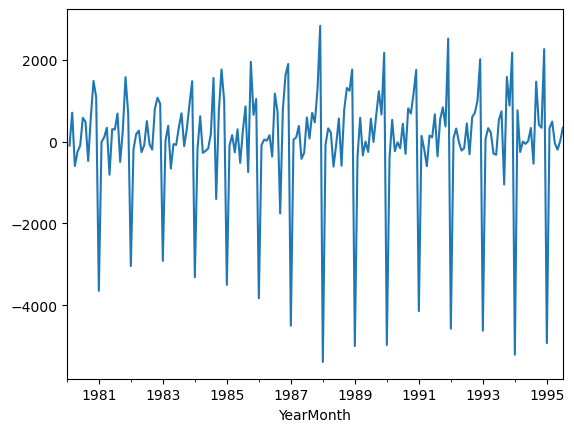

In [19]:
df_spark['spark first difference'].plot()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

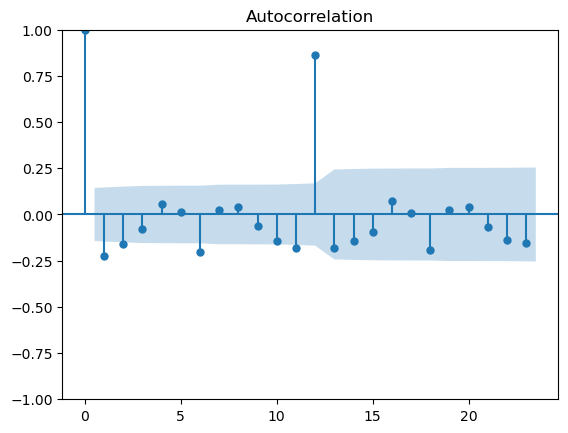

In [21]:
acf = plot_acf(df_spark['spark first difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


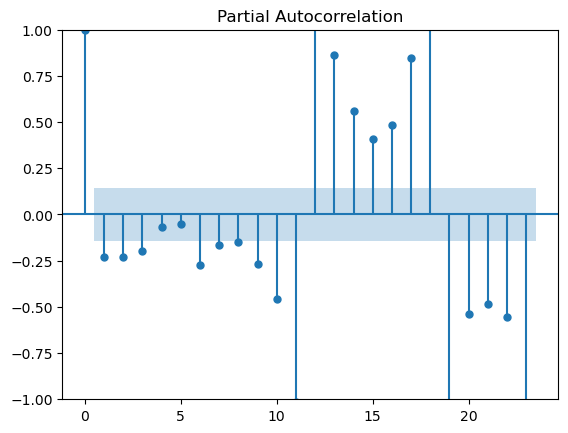

In [22]:
pacf = plot_pacf(df_spark['spark first difference'].dropna())

# Split Data

In [23]:
from datetime import datetime,timedelta

In [24]:
train_dataset_end=datetime(1990,12,1)
test_dataset_end=datetime(1995,3,1)

In [25]:
df_spark

,Sparkling,spark first difference
YearMonth,,
1980-01-01,1686,NaN
1980-02-01,1591,-95.0
1980-03-01,2304,713.0
1980-04-01,1712,-592.0
1980-05-01,1471,-241.0
...,...,...
1995-03-01,1897,495.0
1995-04-01,1862,-35.0
1995-05-01,1670,-192.0


In [26]:
train_data=df_spark[:train_dataset_end]
test_data=df_spark[train_dataset_end+timedelta(days=1):test_dataset_end]

In [27]:
train_data

,Sparkling,spark first difference
YearMonth,,
1980-01-01,1686,NaN
1980-02-01,1591,-95.0
1980-03-01,2304,713.0
1980-04-01,1712,-592.0
1980-05-01,1471,-241.0
...,...,...
1990-08-01,1605,-294.0
1990-09-01,2424,819.0
1990-10-01,3116,692.0


In [28]:
test_data

,Sparkling,spark first difference
YearMonth,,
1991-01-01,1902,-4145.0
1991-02-01,2049,147.0
1991-03-01,1874,-175.0
1991-04-01,1279,-595.0
1991-05-01,1432,153.0
1991-06-01,1540,108.0
1991-07-01,2214,674.0
1991-08-01,1857,-357.0
1991-09-01,2408,551.0


In [29]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [30]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [59]:
model_ARIMA=ARIMA(df_spark['spark first difference'],order=(3,1,2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
model_Arima_fit=model_ARIMA.fit()

In [61]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     spark first difference   No. Observations:                  187
Model:                     ARIMA(3, 1, 2)   Log Likelihood               -1605.191
Date:                    Sun, 30 Jul 2023   AIC                           3222.383
Time:                            20:14:45   BIC                           3241.737
Sample:                        01-01-1980   HQIC                          3230.226
                             - 07-01-1995                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2068   3.94e-05  -3.07e+04      0.000      -1.207      -1.207
ar.L2         -0.4929      0.000  -1785.870      0.000      -0.493      -0.492
ar.L3         -0.2861      0.000  -1196.111      0.000      -0.287      -0.286
ma.L1      -8.148e-05      0.001     -0.128      0.898      -0.001       0.001
ma.L2         -0.9999      0.108     -9.269      0.000      -1.211      -0.788
sigma2      1.746e+06   6.21e-08   2.81e+13      0.000    1.75e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                46.75
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                            -0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+28. Standard errors may be unstable.
"""

In [62]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1991-01-01 00:00:00
1995-03-01 00:00:00


In [63]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['spark first difference']-pred

In [64]:
test_data['Predicted_ARIMA']=pred

C:\Users\Nitin Rathore\AppData\Local\Temp\ipykernel_6560\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='YearMonth'>

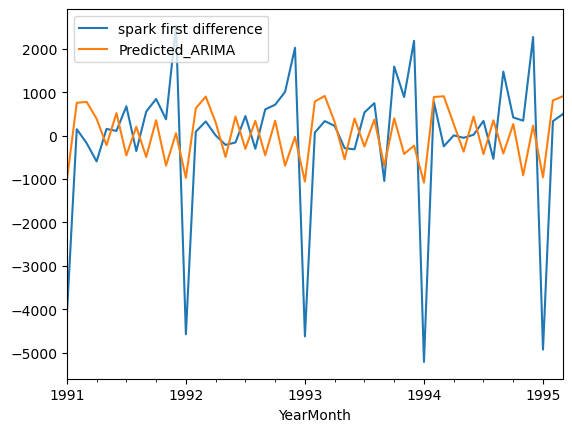

In [65]:
test_data[['spark first difference','Predicted_ARIMA']].plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


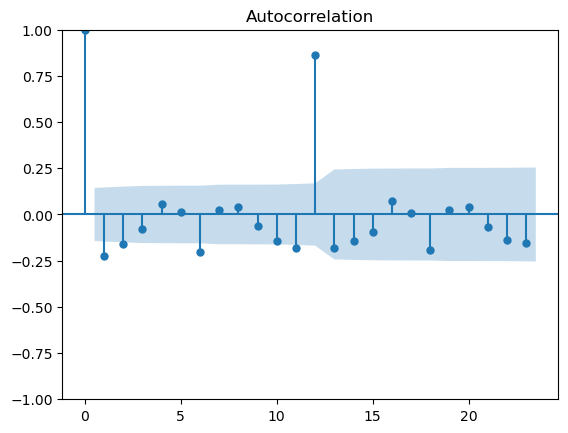

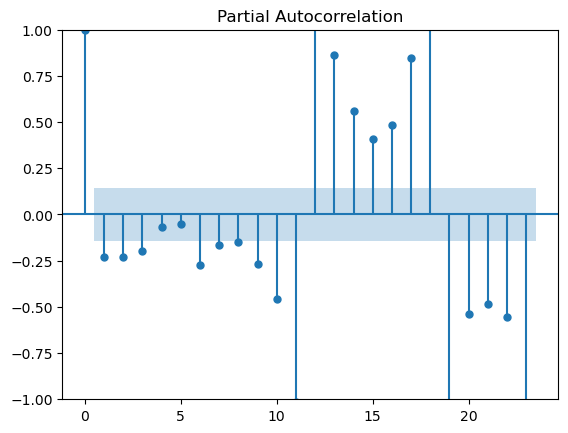

In [66]:
acf12 = plot_acf(df_spark["spark first difference"].dropna())
pacf12 = plot_pacf(df_spark["spark first difference"].dropna())

In [67]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
model_SARIMA=SARIMAX(df_spark['spark first difference'],order=(3,1,2),seasonal_order=(3,1,2,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [76]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             spark first difference   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1300.713
Date:                            Sun, 30 Jul 2023   AIC                           2623.426
Time:                                    20:15:42   BIC                           2658.176
Sample:                                01-01-1980   HQIC                          2637.523
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0483      0.129      0.373      0.709      -0.206       0.302
ar.L2         -0.0578      0.174     -0.331      0.740      -0.400       0.284
ar.L3          0.0059      0.135      0.044      0.965      -0.259       0.271
ma.L1         -1.9029      0.160    -11.901      0.000      -2.216      -1.590
ma.L2          0.9030      0.145      6.246      0.000       0.620       1.186
ar.S.L12       1.0768      0.516      2.088      0.037       0.066       2.088
ar.S.L24      -0.0211      0.329     -0.064      0.949      -0.666       0.624
ar.S.L36      -0.1791      0.375     -0.478      0.633      -0.914       0.555
ma.S.L12      -1.6835      0.576     -2.925      0.003      -2.812      -0.555
ma.S.L24       0.7643      0.507      1.508      0.132      -0.229       1.758
sigma2      2.543e+05   1.13e-06   2.25e+11      0.000    2.54e+05    2.54e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                44.85
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.57
Prob(H) (two-sided):                  0.38   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  2e+27. Standard errors may be unstable.
"""

In [78]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1991-01-01 00:00:00
1995-03-01 00:00:00


In [79]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1991,1,1),end=datetime(1995,3,1))
residuals=test_data['spark first difference']-pred_Sarima

In [80]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Nitin Rathore\AppData\Local\Temp\ipykernel_6560\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='YearMonth'>

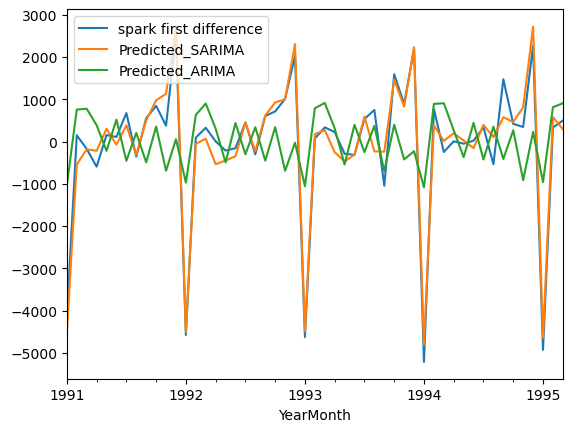

In [81]:
test_data[['spark first difference','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [82]:
# Compute the root mean square error
test_data[['spark first difference','Predicted_SARIMA','Predicted_ARIMA']].mean()

spark first difference   -81.372549
Predicted_SARIMA         -81.098649
Predicted_ARIMA           19.933200
dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [84]:
rmse = sqrt(mean_squared_error(pred,test_data['spark first difference']))
print(rmse)

1504.5172197495635


In [85]:
rmse = sqrt(mean_squared_error(pred,test_data['Predicted_SARIMA']))
print(rmse)

1521.4052082864753


In [86]:
rmse = sqrt(mean_squared_error(pred,test_data['Predicted_ARIMA']))
print(rmse)

0.0


In [87]:
from pandas.tseries.offsets import DateOffset

In [103]:
future_dates=[df_spark.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [104]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_spark.columns)

In [105]:
future_df=pd.concat([df_spark,future_datest_df])